# Simpler Examples of Coupled Oscillators

These are left over notes from earlier examples of coupled resonators.  

I thought in the end it made more sense to just go straight for the t-line model though.

## Circuit Example 1: Two RLC's Coupled Through Resistor

Here we simply take a resistor coupling two RLCs and solve for the current on each side.  


```{figure} ../figures/resistor-coupled-rlcs.png
---
width: 800px
name: fig-resistor-coupled-rlcs
---
Two RLC resonators coupled by a single resistor.
```

/home/dkeathley/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/dkeathley/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-0.3, 1.0)

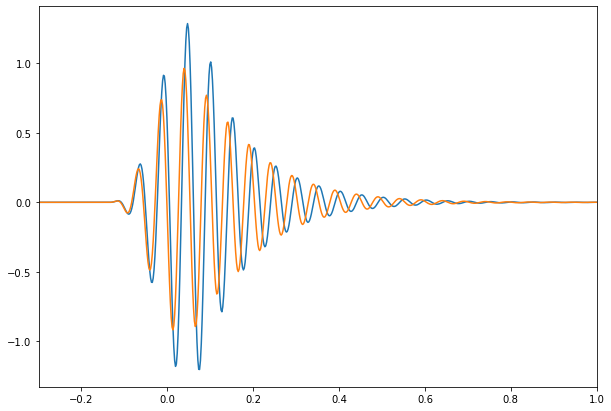

In [713]:
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../includes')
import pulse_functions as pulses


t = np.linspace(-1, 1, 1000)

fwhm = 0.1
fc = 17
wc = 2*np.pi*fc

V1 = pulses.cos2pulse(t, fwhm, wc, 0)['E']
V2 = 1.0*pulses.cos2pulse(t, fwhm, wc, np.pi/2)['E']


fig = plt.figure()
fig.set_size_inches(10, 7)

# plt.plot(t, V1, t, V2)
# plt.xlim(-0.25, 0.25);

R1 = 0.02
w1 = 2*np.pi*20
C1 = 0.05
L1 = 1/w1**2/C1


R2 = 0.02
w2 = 2*np.pi*20
C2 = 0.05
L2 = 1/w2**2/C2

Rc = 0.075

V1f = np.fft.fft(V1)
V2f = np.fft.fft(V2)

dt = t[1] - t[0]
w = np.fft.fftfreq(t.size, d=dt)*2*np.pi

I1f = 1j*w*C1*V1f/(1 - w**2*L1*C1 + 1j*w*R1*C1) + \
     1j*w*C1*V2f/(1 - w**2*L1*C1 + 1j*w*C1*(R1 + Rc))

I2f = 1j*w*C2*V2f/(1 - w**2*L2*C2 + 1j*w*R2*C2) + \
     1j*w*C2*V1f/(1 - w**2*L2*C2 + 1j*w*C2*(R2 + Rc))


I1 = np.fft.ifft(I1f)
I2 = np.fft.ifft(I2f)

plt.plot(t, I1/20)
plt.plot(t, 1*I2/20)
plt.xlim(-0.3, 1.0)
# plt.plot(t, V2)

## Circuit Example 2: Two Coupled RLC Resonators

Now we can more generalize the coupling and circuit model.  In this case we are concerned with voltages that buildup on a capacitor C1.  

This is approaching the most generalized form being the transmission-line model that we follow in the final note.

```{figure} ../figures/generalized-coupled-rlcs.png
---
width: 800px
name: fig-resistor-coupled-rlcs
---
Two RLC resonators coupled by a single resistor.
```

Expressions for the system of equations to solve for the mesh are:

$$I_1 \big (Z_{10} + Z_{11} + 1/(j\omega C1) \big ) - I_2 \big ( Z_{11} + 1/(j\omega C1) \big ) = V1$$

$$I_2 \big (Z_{c0} + Z_{c1} + 1/(j\omega C1)  + Z_{11} \big )
  -I_1 \big ( Z_{11} + 1/(j\omega C1) \big ) 
  -I_3 Z_{c1}= 0$$

$$I_3 \big (Z_{c0} + Z_{21} + 1/(j\omega C2)  + Z_{c1} \big )
  -I_4 \big ( Z_{21} + 1/(j\omega C2) \big ) 
  -I_2 Z_{c1}= 0$$
  
$$   I_3 \big ( Z_{21} + 1/(j\omega C2) \big ) - I_4 \big (Z_{20} + Z_{21} + 1/(j\omega C2) \big ) = V2$$


In the following code, we solve this system of equations and plot voltages on C1 and C2.

0.06384447614514038
(8.631259334585216+64.56792830490946j)


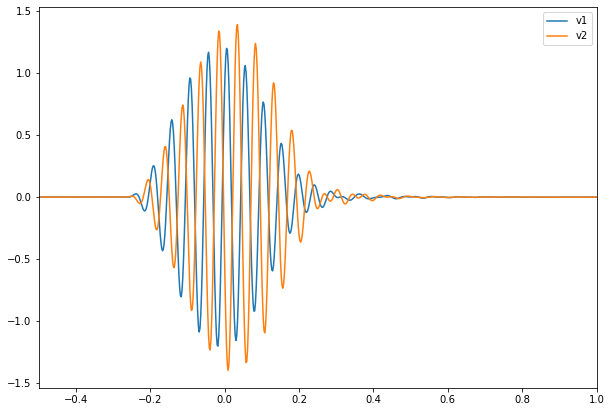

In [342]:
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../includes')
import pulse_functions as pulses


t = np.linspace(-10.5, 10.5, 10000)

fwhm = 0.2
fc = 20
wc = 2*np.pi*fc

V1 = 1.0*pulses.cos2pulse(t, fwhm, wc, 0)['E']
V2 = 1.0*pulses.cos2pulse(t, fwhm, wc, np.pi/2)['E']


fig = plt.figure()
fig.set_size_inches(10, 7)

# plt.plot(t, V1, t, V2)
# plt.xlim(-0.25, 0.25);

R1 = 2.0
w1 = 2*np.pi*23
C1 = 0.00075
L1 = 1/w1**2/C1


R2 = 2.0
w2 = 2*np.pi*23
C2 = 0.00075
L2 = 1/w2**2/C2

print(L2)

Rc = 0.0
# Rc = 1000
Cc = 0.00075
Lc = 0.20


V1f = np.fft.fft(V1)
V2f = np.fft.fft(V2)

dt = t[1] - t[0]
w = np.fft.fftfreq(t.size, d=dt)*2*np.pi

w[np.where(w == 0)[0]] = 1e-18

Z1 = R1 + 1j*w*L1
Z2 = R2 + 1j*w*L2
Zc = Rc + 1j*w*Lc


# a = np.array([[Z1 + 1/(1j*w*C1), -1/(1j*w*C1), np.zeros(w.shape), np.zeros(w.shape)], 
#               [1/(1j*w*C1), -1*Zc - 1/(1j*w*C1) - 1/(1j*w*Cc), 1/(1j*w*Cc), np.zeros(w.shape)],
#               [np.zeros(w.shape), 1/(1j*w*Cc), -1*Zc - 1/(1j*w*Cc) - 1/(1j*w*C2), 1/(1j*w*C2)],
#               [np.zeros(w.shape), np.zeros(w.shape), 1/(1j*w*C2), -1/(1j*w*C2) - Z2]]).transpose()

a = np.array([[Z1 + 1/(1j*w*C1), 1/(1j*w*C1), np.zeros(w.shape), np.zeros(w.shape)],
              [-1/(1j*w*C1),  -1*Zc - 1/(1j*w*C1) - 1/(1j*w*Cc), 1/(1j*w*Cc), np.zeros(w.shape)],
              [np.zeros(w.shape),  1/(1j*w*Cc), -1*Zc - 1/(1j*w*Cc) - 1/(1j*w*C2), 1/(1j*w*C2)],
              [np.zeros(w.shape),  np.zeros(w.shape), 1/(1j*w*C2), -1/(1j*w*C2) - Z2]]).transpose()

b = np.array([V1f, np.zeros(w.shape), np.zeros(w.shape), V2f]).transpose()


If = np.linalg.solve(a, b)

print(b[:, 3].max())

I1f = If[:, 0]
I2f = If[:, 1]
I3f = If[:, 2]
I4f = If[:, 3]

V1of = (I1f - I2f)/(1j*w*C1)
V2of = (I3f - I4f)/(1j*w*C2)

V1o = np.real(np.fft.ifft(V1of))
V2o = np.real(np.fft.ifft(V2of))


plt.plot(t, V1o, label='v1')
plt.plot(t, V2o, label='v2')
plt.xlim(-0.5, 1.0)
plt.legend()
# #plt.plot(t, V2)

(-0.35, 0.6)

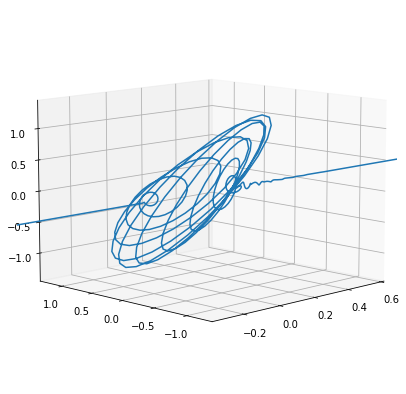

In [343]:
fig = plt.figure()
fig.set_size_inches(10, 7)

ax = plt.axes(projection='3d')
ax.view_init(10, 225)
ax.plot3D(t, V1o, V2o)
ax.set_xlim(-0.35, 0.6)

## Conclusions

In general you can see that the coupling leads to a phasing of the two resonators despite starting at an out-of-phase condition.  This means one would never see exactly a circular polarization at the output of two coupled resonators given circularly-polarized light at the input.  